In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from labellines import labelLine, labelLines

In [6]:
index_data = {
    'N50': pd.read_csv('./current_csv_data/NIFTY 50_Data.csv')[::-1],
    'NN50': pd.read_csv('./current_csv_data/NIFTY NEXT 50_Data.csv')[::-1],
    #'N100': pd.read_csv('./current_csv_data/NIFTY 100_Data.csv')[::-1],
    #'N200': pd.read_csv('./current_csv_data/NIFTY 200_Data.csv')[::-1],
    #'N500': pd.read_csv('./current_csv_data/NIFTY 500_Data.csv')[::-1],
    #'Midcap100': pd.read_csv('./current_csv_data/NIFTY MIDCAP 100_Data.csv')[::-1],
    'Midcap150': pd.read_csv('./current_csv_data/NIFTY MIDCAP 150_Data.csv')[::-1],
    #'Smallcap250': pd.read_csv('./current_csv_data/NIFTY SMALLCAP 250_Data.csv')[::-1],
    #'Microcap250': pd.read_csv('./current_csv_data/NIFTY MICROCAP 250_Data.csv')[::-1],
    #'TotalMarket': pd.read_csv('./current_csv_data/NIFTY TOTAL MARKET_Data.csv')[::-1],
    #'N100EqualWeight': pd.read_csv('./current_csv_data/NIFTY100 EQL WGT_Data.csv')[::-1],
    #'Alpha50': pd.read_csv('./current_csv_data/NIFTY ALPHA 50_Data.csv')[::-1],
    #'AlphaQualityLowVol30': pd.read_csv('./current_csv_data/NIFTY ALPHA QUALITY LOW-VOLATILITY 30_Data.csv')[::-1],
    #'AlphaQualityValueLowVol30': pd.read_csv('./current_csv_data/NIFTY ALPHA QUALITY VALUE LOW-VOLATILITY 30_Data.csv')[::-1],
    'AlphaLowVol': pd.read_csv('./current_csv_data/NIFTY ALPHALOWVOL_Data.csv')[::-1],
    #'LageMidcap250': pd.read_csv('./current_csv_data/NIFTY LARGEMIDCAP 250_Data.csv')[::-1],
    #'LowVol50': pd.read_csv('./current_csv_data/NIFTY LOW VOLATILITY 50_Data.csv')[::-1],
    'Midcap150Quality50': pd.read_csv('./current_csv_data/NIFTY MIDCAP150 QUALITY 50_Data.csv')[::-1],
    #'QualityLowVol30': pd.read_csv('./current_csv_data/NIFTY QUALITY LOW-VOLATILITY 30_Data.csv')[::-1],
    #'N100LowVol30': pd.read_csv('./current_csv_data/NIFTY100 LOWVOL30_Data.csv')[::-1],
    #'N100Quality30': pd.read_csv('./current_csv_data/NIFTY100 QUALTY30_Data.csv')[::-1],
    #'N200Alpha30': pd.read_csv('./current_csv_data/NIFTY200 ALPHA 30_Data.csv')[::-1],
    'N200Momentum30': pd.read_csv('./current_csv_data/NIFTY200 MOMENTUM 30_Data.csv')[::-1],
    #'N200Quality30': pd.read_csv('./current_csv_data/NIFTY200 QUALITY 30_Data.csv')[::-1],
    #'N500Value50': pd.read_csv('./current_csv_data/NIFTY500 VALUE 50_Data.csv')[::-1]    
}


In [7]:
volatilities = {}

for key, data in index_data.items():
    volatilities[key] = data.Close.pct_change().std() * 252 ** 0.5

for index, volatility in sorted(volatilities.items(), key=lambda item: item[1]):
    print(index + (33 - len(index)) * ' ' + '=> ' + str(volatility))

AlphaLowVol                      => 0.1816963535874454
N200Momentum30                   => 0.18212595745953156
Midcap150Quality50               => 0.1834180808829708
Midcap150                        => 0.21760211034283802
N50                              => 0.22164351836189702
NN50                             => 0.2389262938121316


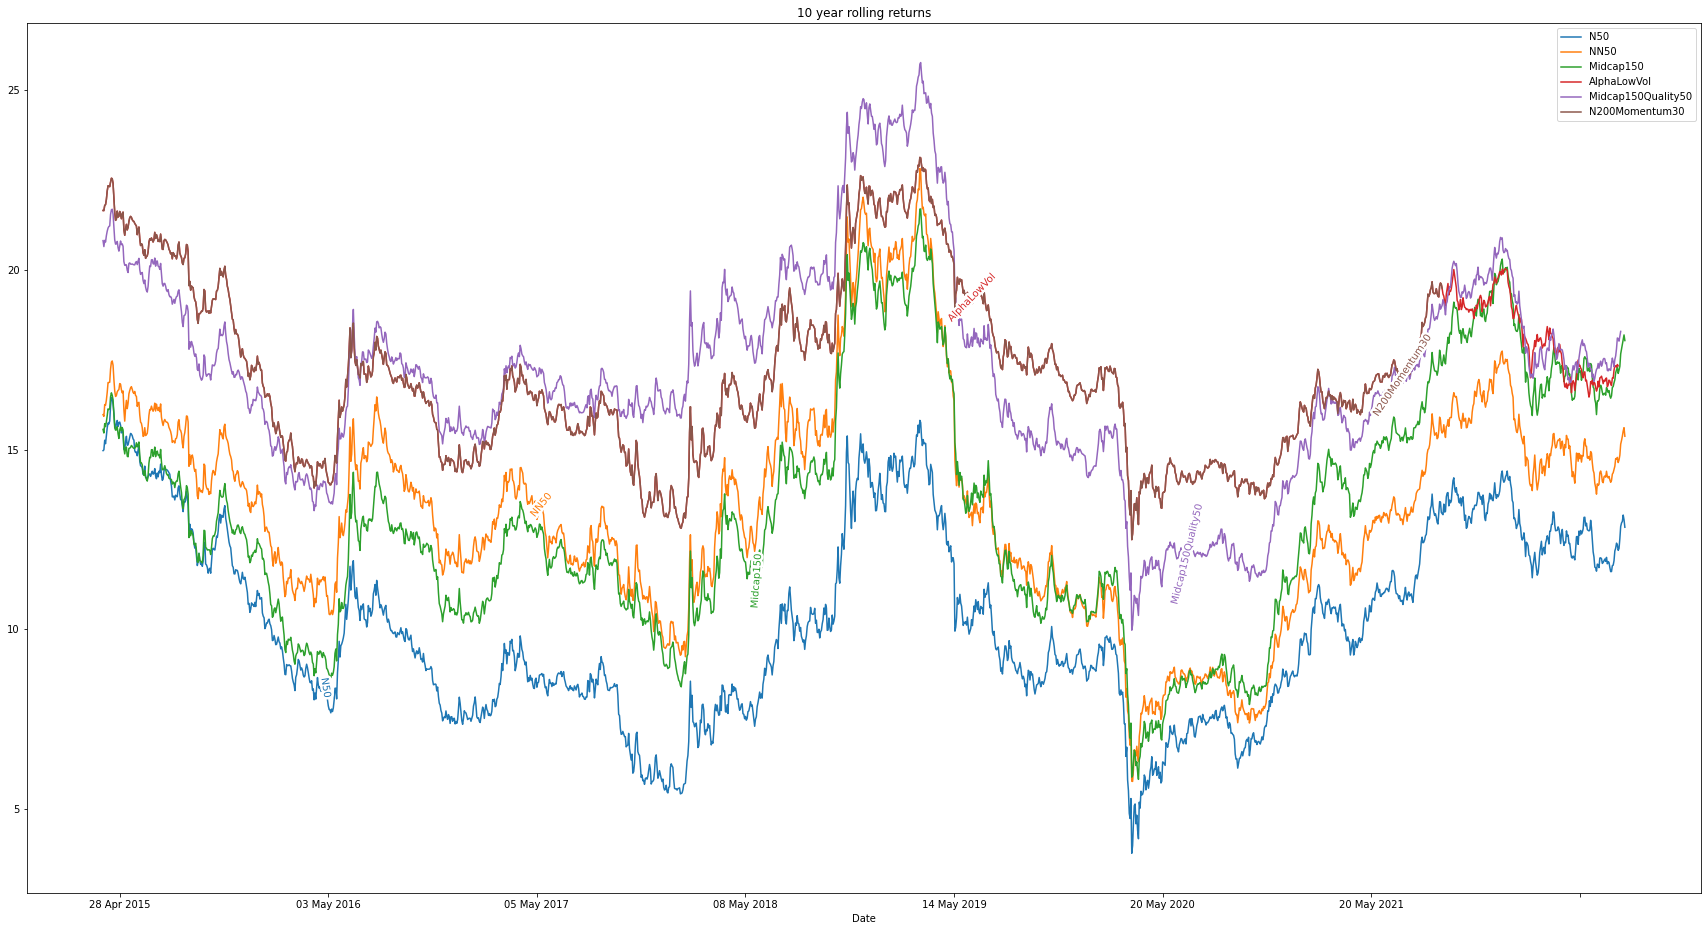

In [8]:
import copy
import mplcursors

days = 248  # avg. # of trading days in a year
years = 10
title = '10 year rolling returns'

returns = copy.deepcopy(index_data)
ax = None

for key, data in index_data.items():
    returns[key][key] = ((1 + data.Close.pct_change(periods= days * years)) ** (1 / years) - 1) * 100

for key, data in returns.items():
    if ax is None:
        ax = data.plot.line(x='Date', y=key, figsize=(30,16), title=title)
    else:
        data.plot.line(x='Date', y=key, ax=ax)   

ax.labelsize = 'large'
labelLines(plt.gca().get_lines(), zorder=5.5)
cursor1 = mplcursors.cursor(ax.lines)